In [3]:
#@title Importing Libraries

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

Mounted at /content/drive


In [192]:
#@title Importing Data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# reading data
train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')

train.head()

<ipython-input-192-244914fa6e19>:7: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/content/drive/MyDrive/advmla-2023-spring/train.csv')


,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,So,2-Jun,NaN,0.258086,89.3938,2.5,2009,all,NaN,1.823646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.321,108.527,0.893017,49.9644,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,So,4-Jun,NaN,1.334920,100.0660,3.4,2009,all,NaN,1.631621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.078,104.017,1.880030,111.9290,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,Sr,4-Jun,NaN,2.274070,104.1070,1.7,2009,all,NaN,1.081662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.556,102.154,2.763870,115.0210,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,Sr,4-Jun,NaN,0.552857,93.2086,2.0,2009,all,NaN,0.942830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.858,106.556,1.218710,84.1698,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,Sr,8-Jun,NaN,1.060130,97.8554,3.8,2009,all,NaN,0.491229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.052,100.724,1.992790,128.0280,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0


In [5]:
#@title Target Count

train['drafted'].value_counts()

0.0    55555
1.0      536
Name: drafted, dtype: int64

In [6]:
#@title Missing Values

print(train.isna().sum())
print(test.isna().sum())

team                       0
conf                       0
GP                         0
Min_per                    0
Ortg                       0
usg                        0
eFG                        0
TS_per                     0
ORB_per                    0
DRB_per                    0
AST_per                    0
TO_per                     0
FTM                        0
FTA                        0
FT_per                     0
twoPM                      0
twoPA                      0
twoP_per                   0
TPM                        0
TPA                        0
TP_per                     0
blk_per                    0
stl_per                    0
ftr                        0
yr                       274
ht                        80
num                     4669
porpag                     0
adjoe                      0
pfr                        0
year                       0
type                       0
Rec_Rank               39055
ast_tov                 4190
rimmade       

In [193]:
#@title Fixing Height

# function to fix heights
def convert_height(height_str):
    if pd.isna(height_str) or height_str in ['-', 'None', 'So', 'Jr', 'Fr', '0']:
        return None
    elif height_str == 'Apr-00':
        return 4*12
    elif height_str == 'May-00':
        return 5*12
    elif height_str == 'Jun-00':
        return 6*12
    elif height_str == 'Jul-00':
        return 7*12
    elif "'" in height_str:
        feet, inches = height_str.split("'")
        return int(feet) * 12 + int(inches)
    elif '-' in height_str:
        try:
            inch, ft = height_str.split("-")
            if ft == 'Jun':
              return int(inch) + 6*12
            elif ft == 'Jul':
              return int(inch) + 7*12
            elif ft == 'May':
              return int(inch) + 5*12
            elif ft == 'Apr':
              return int(inch) + 4*12
        except ValueError:
            return height_str
    else:
        return height_str


train['ht'] = train['ht'].apply(convert_height)

In [194]:
#@title Undersampling and Dropping Unrequired Features

train2 = train[~train['pick'].isna()]

df = train2.drop(columns = ['type','player_id', 'num'], axis=1)

In [195]:
#@title Team Pick Ratio

# Calculate the total number of rows for each team
team_counts = train2['team'].value_counts()

# Calculate the total number of drafted players for each team
drafted_counts = train2[train2['drafted'] == 1]['team'].value_counts()

# Calculate the percentage of drafted players for each team
drafted_percentages = (drafted_counts / team_counts)

# Create a dictionary to map teams to their drafted percentages
team_percentage_mapping = drafted_percentages.to_dict()

# Replace the 'team' column with drafted percentages
df['team_pick_ratio'] = df['team'].map(team_percentage_mapping)
df['team_pick_ratio'].fillna(0, inplace=True)


In [196]:
#@title New Features

# Create zero-value columns
df['team_pick_ratio'] = 0
df['pts_per_min'] = 0
df['pts_created'] = 0
df['second_chance_pts'] = 0
df['disruptive_plays'] = 0
df['total_stops'] = 0
df['total_fg_made'] = 0
df['total_fg_attempts'] = 0
df['pts_per_min'] = 0
df['ast_to_dreb_ratio'] = 0
df['defensive_performance'] = 0
df['overall_player_impact'] = 0
df['total_rebounds'] = 0
df['total_extended_possessions'] = 0
df['pts_per_pick'] = 0
df['potential_predictor'] = 0


    df['team_pick_ratio'] = df['team'].map(team_percentage_mapping)
    df['team_pick_ratio'].fillna(0, inplace=True)

    # Scoring Efficiency Metrics
    df['pts_per_min'] = df['pts'] / df['mp']
    df['pts_created'] = df['pts'] + df['ast']
    df['second_chance_pts'] = df['pts'] + df['oreb']

    # Defensive Metrics
    df['disruptive_plays'] = df['blk'] + df['stl']
    df['total_stops'] = df['dreb'] + df['blk']

    # Shooting Performance Metrics
    df['total_fg_made'] = df['rimmade'] + df['midmade']
    df['total_fg_attempts'] = df['rimmade_rimmiss'] + df['midmade_midmiss']

    # Efficiency Ratios
    df['pts_per_min'] = df['pts'] / df['mp']
    df['ast_to_dreb_ratio'] = df['ast'] / df['dreb']

    # Composite Metrics
    df['defensive_performance'] = df['drtg'] + df['adrtg']
    df['overall_player_impact'] = df['obpm'] + df['dbpm']

    # Rebounding Metrics
    df['total_rebounds'] = df['oreb'] + df['dreb']
    df['total_extended_possessions'] = df['oreb'] + df['dreb'] + df['ast']

    # Performance Under Pressure
    df['pts_per_pick'] = df['pts'] / df['pick']

    # Draft Predictors
    df['potential_predictor'] = df['Rec_Rank'] * df['ast_tov']

In [ ]:
#numeric_cols = df.drop('drafted', axis=1).select_dtypes(include=['float64', 'int64']).columns

def find_indexes_in_list(value_list, search_list):
    indexes = {}
    for value in value_list:
        try:
            index = search_list.index(value)
            indexes[value] = index
        except ValueError:
            indexes[value] = None  # None if not found
    return indexes

# List of values you want to find indexes for
values_to_find = ['pts_per_min', 'pts', 'mp',
                  'pts_created', 'ast',
                  'second_chance_pts', 'oreb',
                  'disruptive_plays', 'blk', 'stl',
                  'total_stops', 'dreb', 'blk',
                  'total_fg_made', 'rimmade', 'midmade',
                  'total_fg_attempts', 'rimmade_rimmiss', 'midmade_midmiss',
                  'pts_per_min', 'pts', 'mp',
                  'ast_to_dreb_ratio', 'ast', 'dreb',
                  'defensive_performance', 'drtg', 'adrtg',
                  'overall_player_impact', 'obpm', 'dbpm',
                  'total_rebounds','oreb','dreb',
                  'total_extended_possessions', 'oreb', 'dreb', 'ast',
                  'pts_per_pick', 'pts', 'pick',
                  'potential_predictor', 'Rec_Rank', 'ast_tov']



# List to search within
search_list = ['GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per',
   'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA',
   'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per', 'stl_per', 'ftr', 'ht',
   'porpag', 'adjoe', 'pfr', 'year', 'Rec_Rank', 'ast_tov', 'rimmade',
   'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'rim_ratio',
   'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade', 'dunks_ratio', 'pick',
   'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm',
   'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk',
   'pts', 'team_pick_ratio', 'pts_per_min', 'pts_created',
   'second_chance_pts', 'disruptive_plays', 'total_stops', 'total_fg_made',
   'total_fg_attempts', 'ast_to_dreb_ratio', 'defensive_performance',
   'overall_player_impact', 'total_rebounds', 'total_extended_possessions',
   'pts_per_pick', 'potential_predictor']

# Find indexes
indexes = find_indexes_in_list(values_to_find, search_list)

# Print the result
for value, index in indexes.items():
    print(f"Value: {value}, Index: {index}")


In [197]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass  # You can add any initialization code here

    def fit(self, X, y=None):
        return self

    def transform(self, X):

      # Scoring Efficiency Metrics
      X[58] = np.divide(X[56], X[47], out=np.zeros_like(X[56]), where=(X[47] != 0))
      X[59] = X[56] + X[53]
      X[60] = X[56] + X[50]

      # Defensive Metrics
      X[61] = X[55] + X[54]
      X[62] = X[51] + X[55]

      # Shooting Performance Metrics
      X[63] = X[29] + X[31]
      X[64] = X[30] + X[32]

      # Efficiency Ratios
      X[65] = np.divide(X[53], X[51], out=np.zeros_like(X[53]), where=(X[51] != 0))

      # Composite Metrics
      X[66] = X[39] + X[40]
      X[67] = X[44] + X[45]

      # Rebounding Metrics
      X[68] = X[50] + X[51]
      X[69] = X[50] + X[51] + X[53]

      # Performance Under Pressure
      X[70] = np.divide(X[56], X[38], out=np.zeros_like(X[56]), where=(X[38] != 0))

      # Draft Predictors
      X[71] = X[27] * X[28]
      return X


In [198]:
#@title Preprocessing and Modelling

categorical_cols = ['team', 'conf', 'yr']
numeric_cols = df.drop('drafted', axis=1).select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create transformers for each type of column
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),   # Imputing with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))      # One hot encoding
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),              # Imputing with mean
    ('feature_engineering', FeatureEngineeringTransformer()),  # feature engineering
    ('scaler', StandardScaler())                              # Scaling
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# ML model
model = LogisticRegression(solver='liblinear')  #max_iter=200

# overall pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Preprocessing
    ('model', model)
])

# Stratified split
X = df.drop('drafted', axis=1)
y = df['drafted']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Fiting pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('feature_engineering',
                                                                   FeatureEngineeringTransformer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['GP', 'Min_per', 'Ortg',
                                                   'usg', 'eFG', 'TS_per',
                                                   'ORB_per', 'DRB_per',
                                                   'AST_per', 'TO_per', 'FTM',
                                                   'FTA', 'FT_per', 'twoPM',
                                                   'twoPA', 'twoP_per', 'TPM',
                                                   'TPA', 'TP_per', 'blk_per',
                                                   'stl_per', 'ftr', 'ht',
                                                   'porpag', 'adjoe', 'pfr',
                                                   'year', 'Rec_Rank',
                                                   'ast_tov', 'rimmade', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['team', 'conf', 'yr'])])),
                ('model', LogisticRegression(solver='liblinear'))])

In [199]:
#@title Model Evaluation Function

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def model_performance(pipeline, X_test=X_test, y_test=y_test):

  # Make predictions on the test data
  y_pred = pipeline.predict(X_test)
  y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

  # Calculate accuracy, auc, precision, recall
  accuracy = accuracy_score(y_test, y_pred)
  auc = roc_auc_score(y_test, y_pred_proba)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)

  print("Accuracy:", accuracy)
  print("AUC:", auc)
  print("Precision:", precision)
  print("Recall:", recall)

  # confusion matrix
  cm = confusion_matrix(y_test, y_pred)

  # Plot the confusion matrix using Seaborn
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.show()

Accuracy: 0.8273381294964028
AUC: 0.8651960784313725
Precision: 0.8260869565217391
Recall: 0.7037037037037037


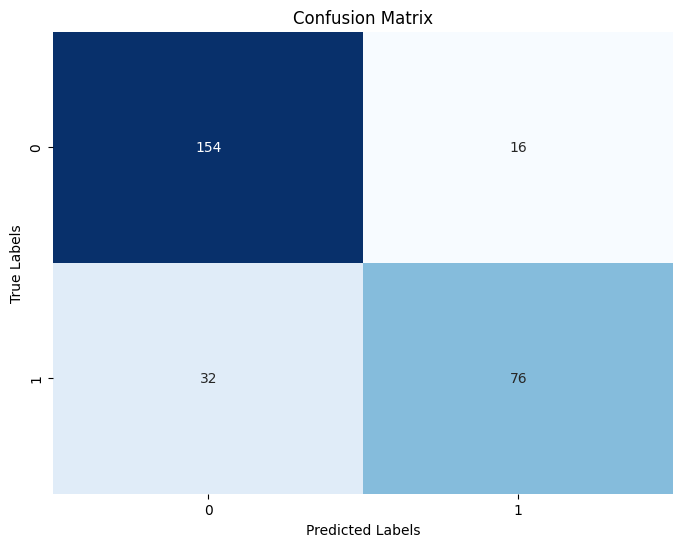

In [200]:
model_performance(pipeline)

In [203]:
#@title Predicting on Kaggle Test Data

#test['ht'] = test['ht'].apply(convert_height)

df_test = test.copy()
# Replace the 'team' column with drafted percentages
df_test['team_pick_ratio'] = test['team'].map(team_percentage_mapping)
df_test['team_pick_ratio'].fillna(0, inplace=True)

# Create zero-value columns
df_test['team_pick_ratio'] = 0
df_test['pts_per_min'] = 0
df_test['pts_created'] = 0
df_test['second_chance_pts'] = 0
df_test['disruptive_plays'] = 0
df_test['total_stops'] = 0
df_test['total_fg_made'] = 0
df_test['total_fg_attempts'] = 0
df_test['pts_per_min'] = 0
df_test['ast_to_dreb_ratio'] = 0
df_test['defensive_performance'] = 0
df_test['overall_player_impact'] = 0
df_test['total_rebounds'] = 0
df_test['total_extended_possessions'] = 0
df_test['pts_per_pick'] = 0
df_test['potential_predictor'] = 0

df_test['drafted'] = pipeline.predict_proba(df_test)[:, 1]
df_test['drafted'] = np.where(df_test['pick'].isna(), 0, df_test['drafted'])


In [205]:
df_test[~df_test['pick'].isna()]

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,team_pick_ratio,pts_per_min,pts_created,second_chance_pts,disruptive_plays,total_stops,total_fg_made,total_fg_attempts,ast_to_dreb_ratio,defensive_performance,overall_player_impact,total_rebounds,total_extended_possessions,pts_per_pick,potential_predictor,drafted
356,Michigan,B10,23,64.6,121.9,18.9,57.0,60.53,4.5,16.6,11.6,11.3,47,54,0.870,52,107,0.486,50,116,0.431,2.3,1.1,24.2,Sr,79.0,2.0,4.589190,127.3240,2.0,2021,all,73.6,1.769285,28.0,49.0,24.0,58.0,0.5714,0.4138,10.0,10.0,1.0000,42.0,95.9651,89.4259,4.12684,138.6520,9.327540,5.801300,3.526240,9.139110,31.6087,6.186080,2.953030,1.0870,4.9130,6.0000,2.0000,0.5652,0.7391,13.0870,735147e7-7b91-44d6-ba59-be394d15b764,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.935578
434,Seton Hall,BE,27,87.8,100.6,28.6,48.8,52.54,6.1,18.5,20.6,19.0,95,133,0.714,126,262,0.481,42,125,0.336,1.7,1.8,34.4,Sr,83.0,23.0,3.920880,117.4430,2.0,2021,all,60.4,0.977520,100.0,179.0,26.0,83.0,0.5587,0.3133,22.0,28.0,0.7857,54.0,100.5100,94.6273,3.97462,184.2360,4.798420,2.716200,2.082220,5.416060,35.5926,4.469070,0.946987,1.8519,5.7037,7.5556,3.2222,1.0741,0.5556,17.5185,7fb2e746-dcab-472a-b5e8-573abc7c2cb0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.924531
624,Gonzaga,WCC,32,79.2,131.2,20.7,64.4,67.38,3.8,13.9,9.0,10.7,86,98,0.878,118,188,0.628,91,207,0.440,1.4,1.5,24.8,Sr,79.0,24.0,5.756450,137.6060,2.1,2021,all,79.0,1.380952,98.0,130.0,20.0,58.0,0.7538,0.3448,9.0,9.0,1.0000,15.0,95.9101,91.9800,3.87892,196.2280,9.907940,8.110100,1.797840,10.428700,31.8125,8.801650,1.627080,0.9375,4.0312,4.9688,1.8125,0.9062,0.4375,18.5938,e534a837-2bcf-4d17-93de-5afcd16555b3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.981471
698,Texas,B12,26,58.3,112.1,18.3,68.6,65.04,10.3,22.0,5.4,20.7,52,100,0.520,94,136,0.691,0,1,0.000,4.6,1.7,73.0,Sr,82.0,20.0,2.603280,116.2700,4.1,2021,all,89.6,0.404730,86.0,108.0,8.0,28.0,0.7963,0.2857,59.0,62.0,0.9516,58.0,92.7025,88.1333,3.28385,144.1240,6.589680,2.310430,4.279250,5.867860,24.5385,3.033550,2.834310,2.1538,5.0769,7.2308,0.6538,0.7308,1.0769,9.2308,9b00d3c7-9636-4b1b-9602-57ff5841616f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.892370
726,Baylor,B12,30,80.8,122.1,21.6,61.3,62.00,1.7,8.1,28.3,20.1,43,66,0.652,95,168,0.565,63,141,0.447,1.3,3.4,21.4,Jr,74.0,45.0,5.112470,130.8250,2.9,2021,all,88.4,2.260305,70.0,111.0,25.0,57.0,0.6306,0.4386,2.0,2.0,1.0000,9.0,95.1321,90.9567,4.07246,184.3390,9.220880,7.125370,2.095510,9.524160,32.4667,6.380530,3.143630,0.4667,2.2000,2.6667,5.5000,1.9000,0.3667,14.0667,d26a4411-2b00-4511-adaa-996b0b8bf577,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.673176
793,Iowa,B10,31,78.8,124.0,30.4,59.6,61.99,10.4,18.2,12.1,8.9,141,199,0.709,237,408,0.581,44,100,0.440,5.2,1.2,39.2,Sr,83.0,55.0,7.041860,149.6430,2.9,2021,all,76.6,1.148935,176.0,256.0,60.0,152.0,0.6875,0.3947,12.0,12.0,1.0000,52.0,99.7365,93.9444,3.64318,209.6680,10.746000,8.575590,2.170420,12.454200,31.6452,11.102400,1.351750,3.0000,5.7419,8.7419,1.7419,0.6774,1.6129,24.0968,66861bba-ac18-4a3f-83a3-737c69e54aad,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.947405
854,Alabama,SEC,33,67.9,103.3,24.3,48.1,52.89,9.4,15.2,21.7,22.9,93,130,0.715,109,232,0.470,20,57,0.351,4.0,3.4,45.0,Sr,80.0,1.0,2.811620,115.0780,4.2,2021,all,70.6,1.161273,99.0,186.0,10.0,47.0,0.5323,0.2128,22.0,25.0,0.8800,35.0,89.8260,84.3453,4.04557,220.7680,8.920100,2.639970,6.280130,7.708570,27.2727,3.082150,4.626430,2.4848,4.0909,6.5758,3.2727,1.7273,1.1212,11.2424,8fb37e1e-8368-4f82-b121-c6a21050b57b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.906775
988,Creighton,BE,29,77.9,114.5,23.3,57.9,60.04,1.1,10.4,23.9,15.7,55,70,0.786,82,159,0.516,80,190,0.421,0.2,2.2,20.1,Jr,74.0,11.0,4.747000,126.1630,2.3,2021,all,

In [207]:
df_test[['player_id', 'drafted']].to_csv('pred_0109.csv', index=False)

In [208]:
import joblib



# Save the model to a file
joblib.dump(pipeline, 'wk3.pkl')

['wk3.pkl']